<a href="https://colab.research.google.com/github/maximo261199/FINAL/blob/main/TSPBackTracking2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%file data.txt
PIURA,AYABACA,SUYO,LA COPA,-4.573242,-80.081772,67,259
PIURA,PIURA,LA ARENA,JESUS MARIA,-5.31377,-80.706803,52,251
PIURA,AYABACA,FRIAS,CACHIRIS,-4.855265,-79.922737,53,249
PIURA,MORROPON,CHULUCANAS,CHARANAL (CHARANAL BAJO),-5.121276,-80.081937,75,249
PIURA,MORROPON,CHULUCANAS,CRUZ DE CAMPANAS,-4.994016,-80.191894,58,249
PIURA,HUANCABAMBA,SAN MIGUEL DE EL FAIQUE,EL HIGUERON,-5.456718,-79.60266,76,248
PIURA,PIURA,LA ARENA,EL PEÑAL,-5.346272,-80.72849,61,247
PIURA,MORROPON,CHULUCANAS,LA UNION,-5.096311,-80.048256,77,246

Overwriting data.txt


Inicio
(608.2905440347907, [0, 1, 2, 3, 4, 5, 6, 7, 0])
(600.2364377659338, [0, 1, 2, 3, 4, 5, 7, 6, 0])
(579.6440825573171, [0, 1, 2, 3, 4, 6, 5, 7, 0])
(573.7780866229328, [0, 1, 2, 3, 5, 7, 4, 6, 0])
(570.9641763193679, [0, 1, 2, 3, 5, 7, 6, 4, 0])
(555.6957775597868, [0, 1, 2, 3, 7, 5, 6, 4, 0])
(553.3052019689711, [0, 1, 2, 5, 3, 7, 6, 4, 0])
(547.5549349942426, [0, 1, 2, 5, 7, 3, 6, 4, 0])
(524.8216612515275, [0, 1, 3, 4, 6, 5, 7, 2, 0])
(521.8107886093192, [0, 1, 3, 6, 4, 7, 5, 2, 0])
(512.2926568244668, [0, 1, 3, 7, 4, 6, 5, 2, 0])
(501.67397739859484, [0, 1, 4, 6, 3, 7, 5, 2, 0])
(474.58577317840553, [0, 1, 6, 2, 3, 4, 5, 7, 0])
(464.4267704929865, [0, 1, 6, 2, 3, 4, 7, 5, 0])
(447.3166320466454, [0, 1, 6, 2, 3, 5, 7, 4, 0])
(429.6576576962487, [0, 1, 6, 2, 5, 3, 7, 4, 0])
(427.4695473617761, [0, 1, 6, 2, 5, 7, 3, 4, 0])
(419.2570201565903, [0, 1, 6, 3, 4, 5, 7, 2, 0])
(401.21906926082715, [0, 1, 6, 3, 4, 7, 5, 2, 0])
(396.3608256538454, [0, 1, 6, 4, 3, 5, 7, 2, 0])
(381.64371

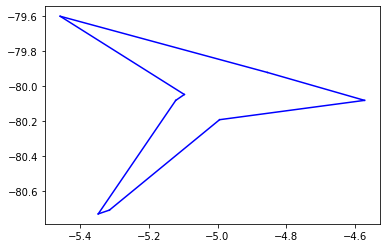

<Figure size 432x288 with 0 Axes>

In [ ]:
import math
import heapq as hq
import matplotlib.pyplot as plt
import time

class Global:
	nodes = list()
	test_d = math.inf

def readpoints(filename):
	with open(filename, "r", encoding="utf8") as f:
		it = 0

		for line in f.readlines():
			reg, prov, dis, asent, x, y, p1, p2 = line.split(",")

			nodo = (float(x), float(y))

			Global.nodes.append(nodo)

			it += 1

def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    return c * r

def draw(s, c="red"):

	for p, e in s:
		X = [Global.nodes[p][0], Global.nodes[e][0]]
		Y = [Global.nodes[p][1], Global.nodes[e][1]]
		plt.plot(X, Y, c)
	plt.show()
	plt.clf()

def list_to_pair(r):
	return [[r[a], r[a+1]] for a in range(len(r)-1)]

def foo_iter(index, ruta, rutas, nodesq, sst, dx=0):
	ruta.append(index)

	for i in nodesq:

		nodesq_ = list(nodesq)
		if i != sst or len(nodesq) == 1:

			x1,y1 = Global.nodes[index]
			x2,y2 = Global.nodes[i]

			d = haversine(y1, x1, y2, x2)
			nodesq_.remove(i)

			foo_iter(i, [a for a in ruta], rutas, nodesq_, sst, dx+d)
		
	if len(nodesq) == 0:
		s = (dx, ruta)
		hq.heappush(rutas, s)

		if Global.test_d > dx:
			Global.test_d = dx
			print(rutas[0])


def start_ex(index, cicle=True):
	print("Inicio")
	Global.test_d = math.inf

	nodesq = [a for a in range(len(Global.nodes))]
	if cicle:
		index = nodesq[index]
	else:
		index = nodesq.pop(index)

	rutas = []

	foo_iter(index, [], rutas, nodesq, index)

	return hq.heappop(rutas)

readpoints("data.txt")

x = time.time()
r = start_ex(0)
print(time.time() - x)

print(r)

draw(list_to_pair(r[1]), "blue")